In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as dt

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

36123
40000
40000
40000
[-14, -11]
-100.0 -10.794670135


<IPython.core.display.Javascript object>


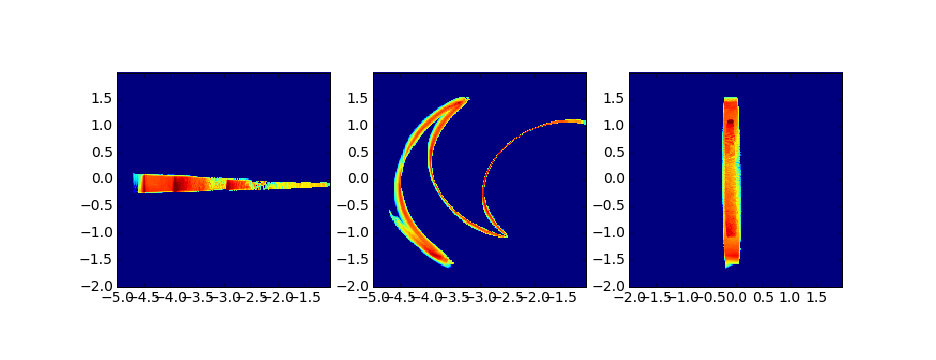

In [23]:
fname = '/shared/users/asousa/WIPP/lightning_power_study/rays/globe_ngo/test_dump.dat'
XMIN =-5
XMAX =-1
YMIN =-2
YMAX =2
ZMIN =-2
ZMAX =2
GRID_STEP_SIZE =0.02

xx = np.arange(XMIN, XMAX, GRID_STEP_SIZE)
yy = np.arange(YMIN, YMAX, GRID_STEP_SIZE)
zz = np.arange(ZMIN, ZMAX, GRID_STEP_SIZE)

tmp = np.fromfile(fname,dtype=np.dtype('<f8'))

data = tmp.reshape(len(xx), len(yy), len(zz), order='c')
data[np.isnan(data)] = 0

xz_sum = np.log10((np.sum(data, axis=1).T)/len(yy))
xy_sum = np.log10((np.sum(data, axis=2).T)/len(zz))
yz_sum = np.log10((np.sum(data, axis=0).T)/len(xx))

print np.sum(data!=0)
print np.sum(xy_sum!=0)
print np.sum(xz_sum!=0)
print np.sum(yz_sum!=0)

xy_sum[np.isinf(xy_sum)] = -100
xz_sum[np.isinf(xz_sum)] = -100
yz_sum[np.isinf(yz_sum)] = -100

clims = [-14,-11]
print clims
print np.min(xy_sum), np.max(xy_sum)
fig, ax = plt.subplots(1,3)

ax[0].pcolorfast(xx, yy, xy_sum, vmin=clims[0], vmax=clims[1])
ax[1].pcolorfast(xx, zz, xz_sum, vmin=clims[0], vmax=clims[1])
ax[2].pcolorfast(yy, zz, yz_sum, vmin=clims[0], vmax=clims[1])

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

In [ ]:
inds = np.where(data != 0)
print np.shape(inds)
print np.shape(data)

import scipy.interpolate

points = np.where(data != 0)
vals   = data[points]
targpoints = np.where(data == 0)
print np.shape(targpoints)

print np.shape(points)


px = xx[points[0]]
py = yy[points[1]]
pz = zz[points[2]]

pvals = np.vstack([px,py,pz]).T
newstep=0.05
# newx = np.arange(XMIN, XMAX,newstep)
# newy = np.arange(YMIN, YMAX,newstep)
# newz = np.arange(ZMIN, ZMAX,newstep)

# gx, gy, gz = np.meshgrid(newy, newx, newz)
# newpoints = np.vstack([gx.flatten(), gy.flatten(), gz.flatten()]).T
newpoints = np.where(data==0)

print pvals
print newpoints
d2 = data

d2[newpoints] = interpolate.griddata(points, vals, newpoints, fill_value = 0, method='linear')

print np.sum(d2!=0)

# d2 = d2.reshape([len(newx), len(newy), len(newz)])

print np.shape(d2)
xz_sum = np.log10((np.sum(d2, axis=1).T)/len(newy))
xy_sum = np.log10((np.sum(d2, axis=2).T)/len(newx))
yz_sum = np.log10((np.sum(d2, axis=0).T)/len(newz))

print np.sum(d2!=0)
print np.sum(xy_sum!=0)
print np.sum(xz_sum!=0)
print np.sum(yz_sum!=0)

xy_sum[np.isinf(xy_sum)] = -100
xz_sum[np.isinf(xz_sum)] = -100
yz_sum[np.isinf(yz_sum)] = -100

clims = [-13,-9]
print clims
print np.min(xy_sum), np.max(xy_sum)
fig, ax = plt.subplots(1,3)

ax[0].pcolorfast(newx, newy, xy_sum, vmin=clims[0], vmax=clims[1])
ax[1].pcolorfast(newx, newz, xz_sum, vmin=clims[0], vmax=clims[1])
ax[2].pcolorfast(newy, newz, yz_sum, vmin=clims[0], vmax=clims[1])

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')



(3, 2394800)
(200, 200, 200)
(3, 5605200)
(3, 2394800)
[[-5.   -0.26  0.22]
 [-5.   -0.26  0.24]
 [-5.   -0.26  0.26]
 ..., 
 [-1.02 -0.04  1.04]
 [-1.02 -0.04  1.06]
 [-1.02 -0.04  1.08]]
(array([  0,   0,   0, ..., 199, 199, 199]), array([  0,   0,   0, ..., 199, 199, 199]), array([  0,   1,   2, ..., 197, 198, 199]))


In [151]:
print np.shape(newdata)
zinds = np.where(data==0)
print np.shape(zinds)
print np.shape(data)

d2 = data

d2[data==0] = newdata

print np.shape(d2)


(0,)
(3, 0)
(200, 200, 200)
(200, 200, 200)


(0,)
(200, 200, 200)
(0,)
0
40000
40000
40000
[-13, -9]
-13.0658580491 -9.96580421468


<IPython.core.display.Javascript object>


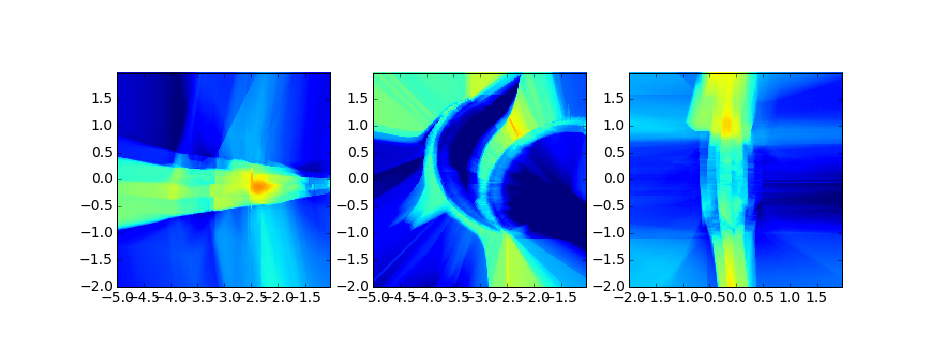

In [154]:
print np.shape(newdata)
print np.shape(data)

# data2 = data

# data2[np.where(data==0)] = newdata

print np.shape(newdata)
xz_sum = np.log10((np.sum(d2, axis=1).T)/len(yy))
xy_sum = np.log10((np.sum(d2, axis=2).T)/len(zz))
yz_sum = np.log10((np.sum(d2, axis=0).T)/len(xx))

print np.sum(newdata!=0)
print np.sum(xy_sum!=0)
print np.sum(xz_sum!=0)
print np.sum(yz_sum!=0)

xy_sum[np.isinf(xy_sum)] = -100
xz_sum[np.isinf(xz_sum)] = -100
yz_sum[np.isinf(yz_sum)] = -100

clims = [-13,-9]
print clims
print np.min(xy_sum), np.max(xy_sum)
fig, ax = plt.subplots(1,3)

ax[0].pcolorfast(xx, yy, xy_sum, vmin=clims[0], vmax=clims[1])
ax[1].pcolorfast(xx, zz, xz_sum, vmin=clims[0], vmax=clims[1])
ax[2].pcolorfast(yy, zz, yz_sum, vmin=clims[0], vmax=clims[1])

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

lonmin:  80
lonmax:  90


<IPython.core.display.Javascript object>


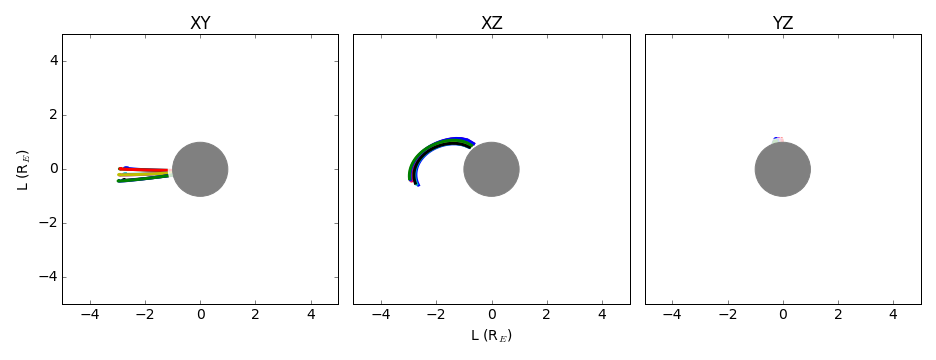

In [29]:
from raytracer_utils import readdump
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Ugh. Does the C code match? Let's find out by trying similar stuff here.
# Load rayfile:
ray_root = '/shared/users/asousa/WIPP/lightning_power_study/rays/globe_ngo/'
rayF = 230
lat_min = 45
lat_max = 55
lon_min = 80
lon_max = 90

flashtime = dt.datetime(2001, 1, 1, 0, 0, 0)
R_E = 6371e3 # Radius of earth in meters
H_IONO = 1000e3
D2R = (np.pi/180.0)
psize = 5

taxis = np.arange(0,3,0.1)


rf = read_rayfiles(ray_root, rayF, lat_min, lat_max, lon_min, lon_max)
rays = []
damp = []
for r in rf:
    # Interpolate onto new time axis
    tx = interpolate.interp1d(r['time'], r['pos'].x).__call__(taxis)
    ty = interpolate.interp1d(r['time'], r['pos'].y).__call__(taxis)
    tz = interpolate.interp1d(r['time'], r['pos'].z).__call__(taxis)
    tmp_coords = coord.Coords(zip(tx, ty, tz),'SM','car',units=['m','m','m'])
#     tmp_coords = coord.Coords(zip(r['pos'].x, r['pos'].y, r['pos'].z),'SM','car',units=['m','m','m'])
    tvec_datetime = [flashtime + dt.timedelta(seconds=s) for s in taxis]
    tmp_coords.ticks = Ticktock(tvec_datetime) # add ticks
#     tmp_coords = tmp_coords.convert('MAG','car')
    tmp_coords.sim_time = r['time']

    rays.append(tmp_coords)
    
    damp.append(interpolate.interp1d(np.array(r['time']),np.array(r['damping'])).__call__(taxis))

#     print np.shape(damp), np.shape(rays)
    
    
    
    
    
    

# -------- 2D Plots -------------------
fig, ax = plt.subplots(1,3)

# Plot the earth
for i in [0, 1, 2]:
    earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
    iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='w',alpha=0.8, zorder=99)
    ax[i].add_patch(earth)   
    ax[i].add_patch(iono)
    
# Plot rays:
for r in rays:
    ax[0].plot(r.x/R_E, r.y/R_E, linewidth=3)
    if r.y[0] < 0:
        ax[1].plot(r.x/R_E, r.z/R_E, linewidth=3, zorder=101)
    else:
        ax[1].plot(r.x/R_E, r.z/R_E, linewidth=3, zorder=10)
    if r.x[0] > 0:
        ax[2].plot(r.y/R_E, r.z/R_E, linewidth=3, zorder=101)
    else:
        ax[2].plot(r.y/R_E, r.z/R_E, linewidth=3, zorder=10)


ax[0].set_title('XY')
ax[1].set_title('XZ')
ax[2].set_title('YZ')
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[1].set_xlabel('L (R$_E$)')
ax[0].set_ylabel('L (R$_E$)')

ax[0].set_xlim([-psize, psize])
ax[0].set_ylim([-psize, psize])
ax[1].set_xlim([-psize, psize])
ax[1].set_ylim([-psize, psize])
ax[2].set_xlim([-psize, psize])
ax[2].set_ylim([-psize, psize])

fig.tight_layout()

# fig.savefig(figtitle, ldpi=300)



In [282]:

px = []
for r in rays:
    px.



(21, 30)

lonmin:  -10
lonmax:  10
lonmin:  -10
lonmax:  10
(50, 50, 50)
['qs', 'ms', 'nus', 'pos', 'n', 'stopcond', 'vprel', 'B0', 'damping', 'w', 'time', 'Nspec', 'Ns', 'vgrel']
dmin, dmax 0.000228357355699 0.00887028111557
(50, 50, 50)


<IPython.core.display.Javascript object>


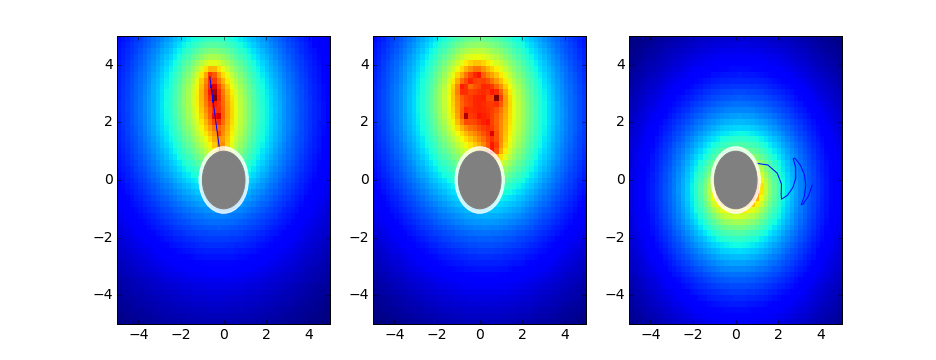

(-5.0, 5.0)

In [26]:
from scipy import interpolate
# Ugh. Does the C code match? Let's find out by trying similar stuff here.
# Load rayfile:
ray_root = '/shared/users/asousa/WIPP/lightning_power_study/rays/globe_simple/'

lat_min = 20
lat_max = 30
lon_min = -10
lon_max = 10

flashtime = dt.datetime(2001, 1, 1, 0, 0, 0)
R_E = 6371e3 # Radius of earth in meters
H_IONO = 1000e3
D2R = (np.pi/180.0)
psize = 5


rf_lo = read_rayfiles(ray_root, 200, lat_min, lat_max, lon_min, lon_max)
rf_hi = read_rayfiles(ray_root, 230, lat_min, lat_max, lon_min, lon_max)


xaxis = np.linspace(-5, 5,50)
yaxis = np.linspace(-5, 5, 50)
zaxis = np.linspace(-5, 5, 50)

gx, gy, gz = np.meshgrid(xaxis, yaxis, zaxis)
print np.shape(gx)
# gx = gx.flatten()
# gy = gy.flatten()
# gz = gz.flatten()

# g = np.vstack([gx, gy, gz]).T

# print g

print rf_lo[0].keys()

tnew = np.arange(0, 10, 0.5)

px = []
py = []
pz = []
damp = []

for r in rf_lo[0:1]:

    damping = 1.0/np.array(r['damping'])
    px.extend(interpolate.interp1d(r['time'], r['pos'].x/R_E).__call__(tnew))
    py.extend(interpolate.interp1d(r['time'], r['pos'].y/R_E).__call__(tnew))
    pz.extend(interpolate.interp1d(r['time'], r['pos'].z/R_E).__call__(tnew))
    damp.extend(interpolate.interp1d(r['time'],r['damping']).__call__(tnew))


rbfi = interpolate.Rbf(px, py, pz, damp, function='inverse')
rbfi.epsilon=0.001
# interp = interpolate.NearestNDInterpolator(p, damp)

damp_int = rbfi(gx, gy, gz)

print "dmin, dmax", np.min(damp_int), np.max(damp_int)
# damp_int = damp_int.reshape(len(xaxis), len(yaxis), len(zaxis), order='c')


print np.shape(damp_int)
syz = np.sum(damp_int, axis=0)
sxz = np.sum(damp_int, axis=1)
sxy = np.sum(damp_int, axis=2)

# # print np.shape(sxy)
fig, ax = plt.subplots(1,3)
# Plot the earth
for i in [0, 1, 2]:
    earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
    iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='w',alpha=0.8, zorder=99)
    ax[i].add_patch(earth)   
    ax[i].add_patch(iono)
    


ax[0].pcolormesh(xaxis, yaxis, sxy)
ax[1].pcolormesh(xaxis, zaxis, sxz)
ax[2].pcolormesh(yaxis, zaxis, syz)

ax[0].plot(px, py)
ax[1].plot(px, pz)
ax[2].plot(py, pz)

ax[0].set_xlim([np.min(xaxis), np.max(xaxis)])
ax[1].set_xlim([np.min(xaxis), np.max(xaxis)])
ax[2].set_xlim([np.min(yaxis), np.max(yaxis)])

ax[0].set_ylim([np.min(yaxis), np.max(yaxis)])
ax[1].set_ylim([np.min(zaxis), np.max(zaxis)])
ax[2].set_ylim([np.min(zaxis), np.max(zaxis)])





<IPython.core.display.Javascript object>


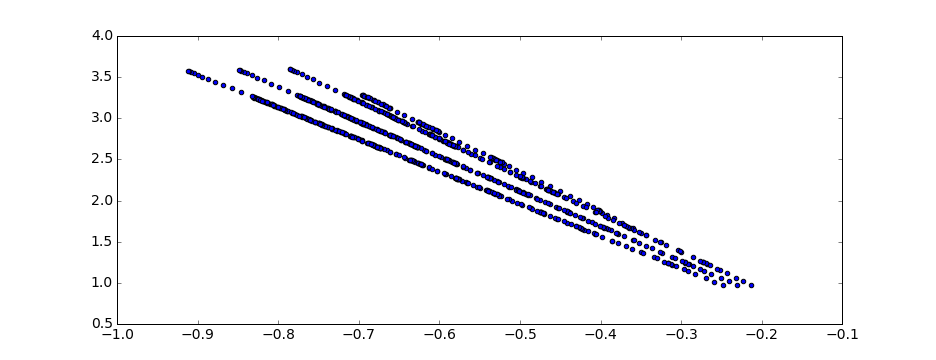

In [ ]:
input_power_scaling(double* flash_loc, double* ray_loc, double mag_lat, double w, double i0, double MLT) {
    // Returns ray power at the top of the ionosphere
    // per unit in area and frequency.

    double theta;        // angle between two vectors
    double gc_distance; // great circle distance between two points
    double dist_tot;
    double xi;

    double S, S_vert;
    double attn_factor;
    double w_sq, f;

    // Vector3d v1;
    // Vector3d v2;
    double v1[3];
    double v2[3];

    f = w/(2.0*PI);
    
    cardeg(flash_loc, v1);
    cardeg(ray_loc,   v2);
    gc_distance = haversine_distance(v1[1], v1[2], v2[1], v2[2]);
    // v1 = Map<VectorXd>(flash_loc,3,1);
    // v2 = Map<VectorXd>(ray_loc,  3,1);

    // theta = acos(v1.dot(v2)/(v1.norm()*v2.norm()));
    // // Arc length (~great-circle distance) between vI0ectors
    // gc_distance = (R_E)*theta;

    // cout << "gc_distance: " << gc_distance << "\n";
    // total distance up to ionosphere:
    dist_tot = hypot(gc_distance, H_IONO);
    xi = atan2(gc_distance, H_IONO);  // Incident angle

    w_sq =  pow( w , 2 );
    S = ( (1/Z0) * pow( (H_E*i0*2E-7*(sin(xi)/dist_tot)*w*(P_A-P_B)) , 2 ) 
                   /  (  (w_sq+pow(P_A,2))*(w_sq+pow(P_B,2))  )      ) ;
    S_vert = S * cos(xi) ;  // factor for vert prop.

    // Ionosphere absorption model
    attn_factor = pow(10,-(graf_iono_absorp(mag_lat,f, MLT )/10)  );
    S_vert = S_vert * attn_factor;

    // printf("i0: %2.3f, dist_tot: %2.3f, xi: %2.3f, S_vert; %e\n",i0, dist_tot, xi, S_vert);
    
    return S_vert;
}


In [2]:
import ctypes as ct
lib_path = '/shared/users/asousa/WIPP/lightning_power_study/python/liblightning.so'
ct.cdll.LoadLibrary(lib_path)
ll = ct.CDLL(lib_path)
d3 = ct.c_double*3
d1 = ct.c_double

# get the function (ugly name)
input_power_scaling = ll._Z19input_power_scalingPdS_dddd

# double total_input_power(double flash_pos_sm[3], double i0, 
#                         double latmin, double latmax, double lonmin, double lonmax, double wmin, double wmax, int itime_in[2]) {

x_in = [1,0,0]
r_in = [1,1.1,0]
flash_pos_sm = d3(*x_in)
ray_pos_sm   = d3(*r_in)
mag_lat = d1(25)
w       = d1(200*np.pi*2)
i0      = d1(-10000)
MLT     = d1(0)

input_power_scaling(ct.byref(flash_pos_sm), ct.byref(ray_pos_sm), ct.byref(mag_lat), ct.byref(w), ct.byref(i0), ct.byref(MLT))



NameError: name 'np' is not defined